# Plot Covid-19 charts

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns
import util
import pandas as pd
from datetime import datetime
from PIL import Image

## Loading data

In [2]:
df_covid_brazil = pd.read_csv('data/output/df_ts_covid_brazil.csv')
df_covid_brazil.DATA = pd.to_datetime(df_covid_brazil.DATA, infer_datetime_format=True)

In [3]:
case_valleys = []

with open('data/output/valleys.csv', "r") as file:
    for line in file:
        date_str = line.strip()
        date = datetime.strptime(date_str, "%Y-%m-%d").date()
        case_valleys.append(date)

## Plot charts

In [4]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
plt.rc('font', size=8)
sns.set_style("ticks")

### Figure 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


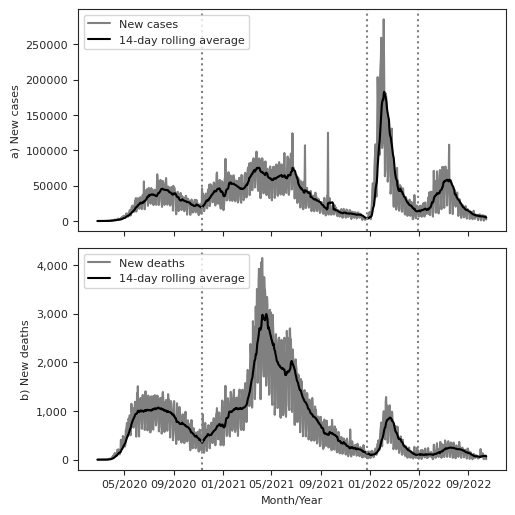

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(13.2)), sharex=True)

labels = ['New cases', 'New deaths']
labels_y = ['a) New cases', 'b) New deaths']
columns = ['CASOS_NOVOS', 'OBITOS_NOVOS']

for i in range(2):
    ax[i].plot(df_covid_brazil.DATA, df_covid_brazil[columns[i]], color='gray', label=labels[i])
    ax[i].plot(df_covid_brazil.DATA, df_covid_brazil[columns[i]+'_MEDIA_14_DIAS'], color='black', label='14-day rolling average')

    ax[i].axvline(case_valleys[0], 0, 1, linestyle=':', color='gray')
    ax[i].axvline(case_valleys[1], 0, 1, linestyle=':', color='gray')
    ax[i].axvline(case_valleys[2], 0, 1, linestyle=':', color='gray')

    ax[i].legend()

    ax[i].set(ylabel=labels_y[i])

ax[1].xaxis.set_major_formatter(myFmt)
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Month/Year')
# plt.xticks(rotation=20)

fig.tight_layout()
plt.savefig('images/serie_cases_deaths.eps', bbox_inches="tight")
plt.savefig('images/serie_cases_deaths.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open("images/serie_cases_deaths.tiff")
img.save("images/serie_cases_deaths_compressed.tiff", compression="tiff_lzw")
plt.show()

### Figure 4

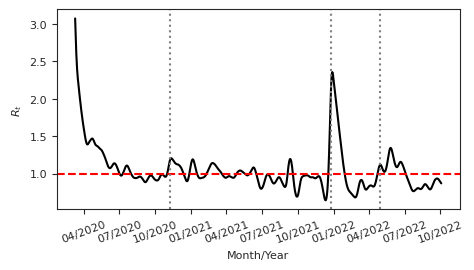

In [8]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(6.6)))
sns.lineplot(data=df_covid_brazil, x="DATA", y="NUMERO_REPRODUCAO_EFETIVO_MEDIA", markers=False, color='black')
plt.axhline(1, 0, 1, linestyle='--', color='red')
plt.ylabel('$R_{t}$')
ax.xaxis.set_major_formatter(myFmt)
plt.xlabel('Month/Year')
plt.xticks(rotation=20)
plt.axvline(case_valleys[0], 0, 1, linestyle=':', color='gray')
plt.axvline(case_valleys[1], 0, 1, linestyle=':', color='gray')
plt.axvline(case_valleys[2], 0, 1, linestyle=':', color='gray')
plt.savefig('images/reproduction_number.eps', bbox_inches="tight", transparent=True)
plt.savefig('images/reproduction_number.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open("images/reproduction_number.tiff")
img.save("images/reproduction_number_compressed.tiff", compression="tiff_lzw")
plt.show()